In [ ]:
import pandas as pd
data = pd.read_csv('gts-seoul.csv')

In [ ]:
# 문제1
# 습도, 풍속, 현지기압, 기온, 이슬점 온도
tmp = data[data['일시'] == '2011-03-21 06:00']
tmp['습도'] + tmp['풍속'] + tmp['현지기압'] + tmp['기온'] + tmp['이슬점 온도'] 

2101    1038.9
dtype: float64

In [ ]:
# 문제2
data = data[['습도','풍속','현지기압','기온','이슬점 온도']]
data = data.dropna()
len(data) + data['습도'].mean() + data['풍속'].max() + data['기온'].min()

32128.421619683173

In [ ]:
# 문제3-1
def corr(a,b):
  a = a - a.mean()
  b = b - b.mean()
  return (a * b).sum() / (((a * a).sum() * (b * b).sum()) ** 0.5)
  
a = corr(data['습도'],data['이슬점 온도'])
b = corr(data['풍속'],data['이슬점 온도'])
c = corr(data['현지기압'],data['이슬점 온도'])
d = corr(data['기온'],data['이슬점 온도'])
print(a,b,c,d)
print(a,b,c,d)

0.5721226831001317 -0.08680173999760286 -0.20970152226101688 0.9035827918403053


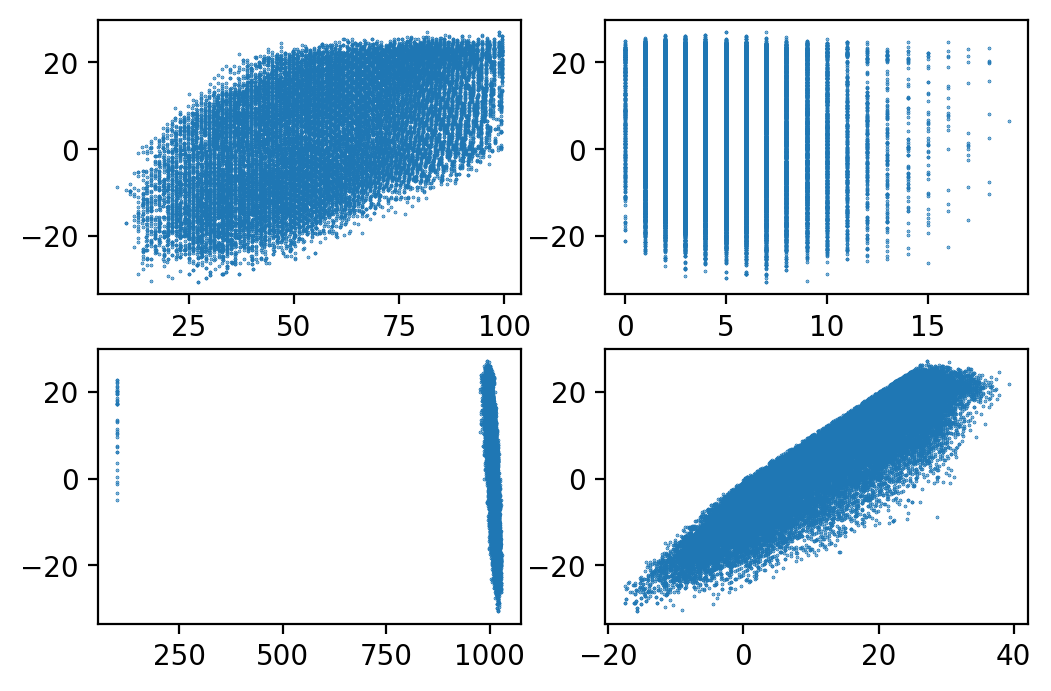

In [ ]:
# 문제3-2
import matplotlib.pyplot as plt

plt.figure(dpi=200)
plt.subplot(2,2,1)
plt.scatter(data['습도'], data['이슬점 온도'], s=0.1)

plt.subplot(2,2,2)
plt.scatter(data['풍속'], data['이슬점 온도'], s=0.1)

plt.subplot(2,2,3)
plt.scatter(data['현지기압'], data['이슬점 온도'], s=0.1)

plt.subplot(2,2,4)
plt.scatter(data['기온'], data['이슬점 온도'], s=0.1)

In [ ]:
# 문제3-3
data = data[(data['현지기압']<200) == False]
data

,습도,풍속,현지기압,기온,이슬점 온도
0,70.7,3.0,995.0,25.0,19.3
1,61.8,3.0,993.9,27.9,19.9
2,49.7,3.0,992.3,30.5,18.8
3,66.8,6.0,992.1,28.8,22.0
4,79.6,4.0,993.4,26.3,22.5
...,...,...,...,...,...
32080,65.7,11.0,987.0,21.7,15.0
32081,83.8,5.0,989.7,18.9,16.1
32082,84.9,7.0,991.2,18.8,16.2
32083,85.9,4.0,991.7,18.4,16.0


In [ ]:
# 문제3-4
def corr(a,b):
  a = a - a.mean()
  b = b - b.mean()
  return (a * b).sum() / (((a * a).sum() * (b * b).sum()) ** 0.5)
  
a = corr(data['습도'],data['이슬점 온도'])
b = corr(data['풍속'],data['이슬점 온도'])
c = corr(data['현지기압'],data['이슬점 온도'])
d = corr(data['기온'],data['이슬점 온도'])
print(a,b,c,d)
print(a+b+b+d)

0.5721221451072883 -0.08681412771332694 -0.7701750683144203 0.9035922524679421
1.3020861421485765


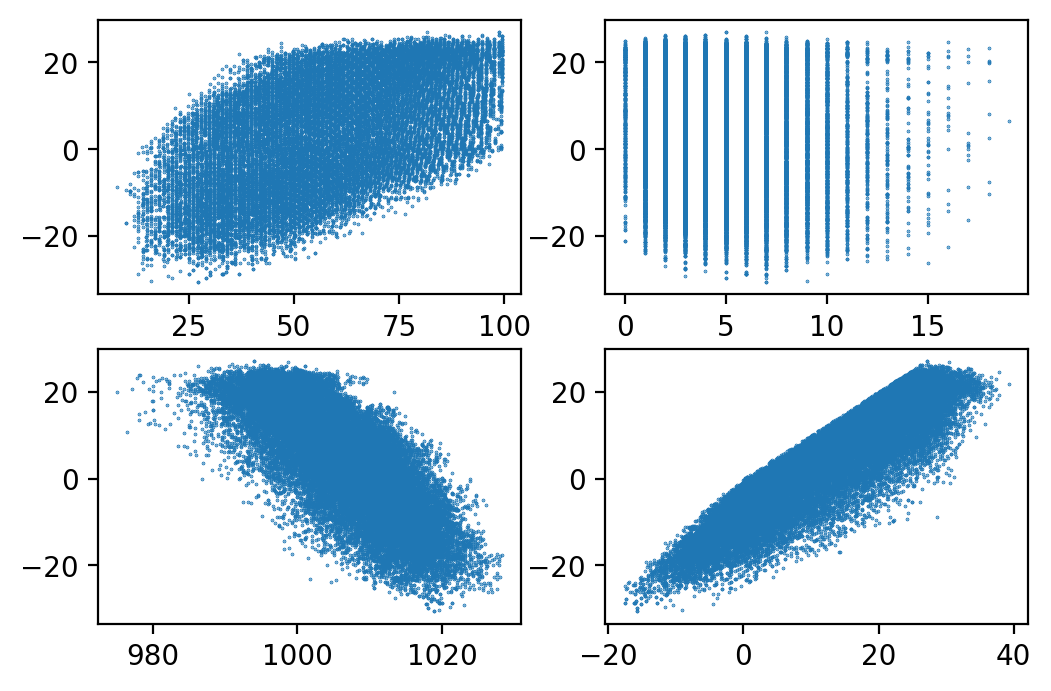

In [ ]:
# 문제3-5
import matplotlib.pyplot as plt

plt.figure(dpi=200)
plt.subplot(2,2,1)
plt.scatter(data['습도'], data['이슬점 온도'], s=0.1)

plt.subplot(2,2,2)
plt.scatter(data['풍속'], data['이슬점 온도'], s=0.1)

plt.subplot(2,2,3)
plt.scatter(data['현지기압'], data['이슬점 온도'], s=0.1)

plt.subplot(2,2,4)
plt.scatter(data['기온'], data['이슬점 온도'], s=0.1)

In [ ]:
# 문제4-1
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = data[['습도','풍속','현지기압','기온']]
Y = data['이슬점 온도']

model.fit(X,Y)
print(model.coef_) # w
print(model.intercept_) # b

[ 0.2676329  -0.03078923  0.00952646  0.92936961]
-32.91662937401235


In [ ]:
# 문제4-2

predicted = model.predict(X)
((predicted - Y)**2).mean()

1.168514629572586

In [ ]:
# 여기서부터 냥이갱얼쥐 문제
# 문제1

import pickle
data = pickle.load(open("mid_animal_data_pub.pkl","rb"))

import matplotlib.pyplot as plt

plt.figure(dpi=150)
for i in range(10):
  plt.subplot(5,2,i+1)
  plt.imshow(data['test1_images'][i])

plt.show

In [ ]:
# 문제2

def cosine(a,b):
  return (a * b).sum() / (((a * a).sum() * (b * b).sum()) ** 0.5)
  
cosine(data['train_vectors'][0],data['test1_vectors'][1])

-0.23914207238931945

In [ ]:
# 문제3

ids = []
for i in range(10):
  arr = []
  for j in range(data['train_vectors'].shape[0]):
    arr.append((cosine(data['test1_vectors'][i], data['train_vectors'][j]),j))
  arr.sort(reverse=True)
  ids.append([i for c,i in arr[:3]])

# 346, 442, 158

[[346, 442, 158],
 [463, 97, 70],
 [240, 699, 480],
 [571, 977, 338],
 [593, 282, 584],
 [498, 835, 37],
 [736, 324, 918],
 [127, 382, 959],
 [7, 991, 141],
 [447, 847, 501]]

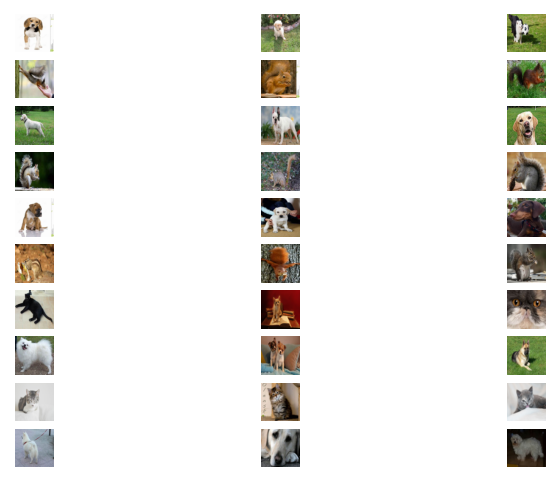

In [ ]:
# 문제4

plt.figure(dpi=150)
i = 1
for arr in ids:
  for j in arr:
    plt.subplot(10,3,i)
    plt.imshow(data['train_images'][j])
    plt.axis("off")
    i+=1
  plt.show

In [ ]:
# 문제5

import torch
import torch.nn as nn
import torch.nn.functional as F

x_train = torch.from_numpy(data["train_vectors"])
y_train = torch.from_numpy(data["train_labels"])

model = nn.Linear(256,3)

optim = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(10001):
    z = model(x_train)
    cost = F.cross_entropy(z, y_train)

    optim.zero_grad()
    cost.backward()
    optim.step()

    with torch.no_grad():
        if epoch % 1000 == 0:
            print(f"epoch: {epoch}, cost: {cost.item()}")


epoch: 0, cost: 0.9695513844490051
epoch: 1000, cost: 4.7915364120854065e-05
epoch: 2000, cost: 3.1940195185597986e-05
epoch: 3000, cost: 2.0916415451210923e-05
epoch: 4000, cost: 1.3434946595225483e-05
epoch: 5000, cost: 8.505489859089721e-06
epoch: 6000, cost: 5.324665380612714e-06
epoch: 7000, cost: 3.307854740342009e-06
epoch: 8000, cost: 2.045711880782619e-06
epoch: 9000, cost: 1.2617598486031056e-06
epoch: 10000, cost: 7.777709356560081e-07


In [ ]:
# 문제6

test2 = torch.from_numpy(data['test2_vectors'])

ans = torch.argmax(model(test2), dim=1)
"".join([str(x) for x in ans.tolist()])

'212220001122112100202120111122'